## Contour

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
path = '/scratch/aabramow/clim680_dataset/'
fname = 'MERRA2_400.tavg1_2d_adg_Nx.20150825.nc4'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:   (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time      (time) datetime64[ns] 2015-08-25T00:30:00 ... 2015-08-25T23:30:00
Data variables: (12/115)
    BCDP001   (time, lat, lon) float32 ...
    BCDP002   (time, lat, lon) float32 ...
    BCEM001   (time, lat, lon) float32 ...
    BCEM002   (time, lat, lon) float32 ...
    BCEMAN    (time, lat, lon) float32 ...
    BCEMBB    (time, lat, lon) float32 ...
    ...        ...
    SUSV003   (time, lat, lon) float32 ...
    SUSV004   (time, lat, lon) float32 ...
    SUWT001   (time, lat, lon) float32 ...
    SUWT002   (time, lat, lon) float32 ...
    SUWT003   (time, lat, lon) float32 ...
    SUWT004   (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Sun Sep  6 06...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_adg_Nx.20150825.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HM00OHQBHKTP
    RangeBeginningDate:                2015-08-25
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2015-08-25
    RangeEndingTime:                   23:59:59.000000

In [3]:
ds_mean=ds.mean(dim='time')

''

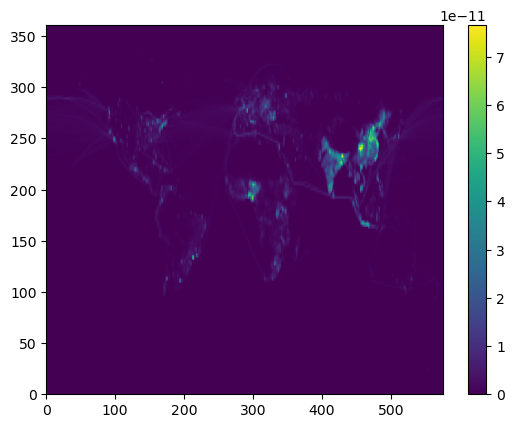

In [4]:
plt.pcolormesh(ds_mean['OCEMAN'])
plt.colorbar() 
;

## With Map

In [5]:
# selecting variable for lat lon and time
lon = ds['lon'][:]
lat = ds['lat'][:] 
time = ds['time'][:]

#converting lon lat in lon2d and lat2d
lon2d, lat2d = np.meshgrid(lon, lat)

In [6]:
ds.OCEMAN

<xarray.DataArray 'OCEMAN' (time: 24, lat: 361, lon: 576)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [2.049749e-14, 2.055300e-14, ..., 2.039341e-14, 2.044198e-14],
        [3.630429e-14, 3.630429e-14, ..., 3.630429e-14, 3.630429e-14]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [2.049749e-14, 2.055300e-14, ..., 2.039341e-14, 2.044198e-14],
        [3.630429e-14, 3.630429e-14, ..., 3.630429e-14, 3.630429e-14]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [2.049749e-14, 2.055300e-14, ..., 2.039341e-14, 2.044198e-14],
        [3.630429e-14, 3.630429e-14, ..., 3.630429e-14, 3.630429e-14]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [2.049749e-14, 2.055300e-14, ..., 2.039341e-14, 2.044198e-14],
        [3.630429e-14, 3.630429e-14, ..., 3.630429e-14, 3.630429e-14]]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2015-08-25T00:30:00 ... 2015-08-25T23:30:00
Attributes:
    long_name:       Organic Carbon Anthropogenic Emissions __ENSEMBLE__
    units:           kg m-2 s-1
    fmissing_value:  1000000000000000.0
    standard_name:   Organic Carbon Anthropogenic Emissions __ENSEMBLE__
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

Text(0.5, 1.0, 'Average Organic Carbon Anthropogenic Emissions On August 25th, 2015')

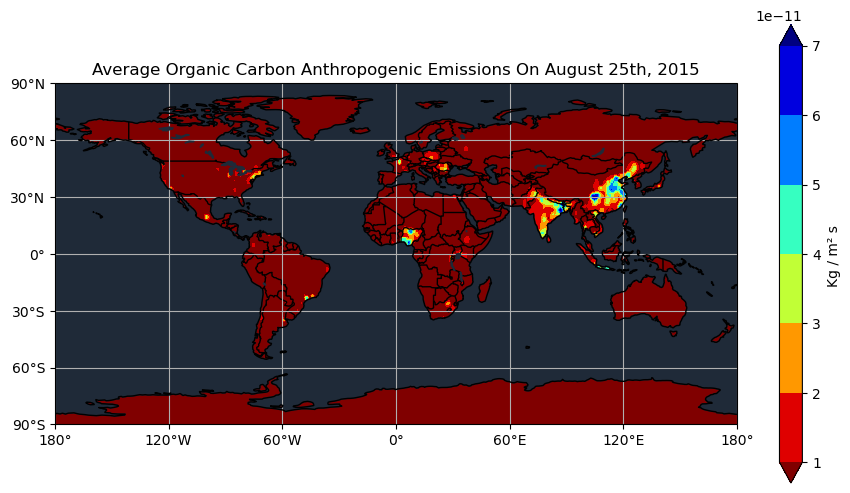

In [32]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['OCEMAN']
data, lons = add_cyclic_point(data, coord=ds['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='jet_r',extend='both')

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='vertical',label='Kg / m\u00b2 s ')

# Add title
plt.title('Average Organic Carbon Anthropogenic Emissions On August 25th, 2015')